<a href="https://colab.research.google.com/github/krakowiakpawel9/decision_tree_course/blob/master/02_wska%C5%BAnik_Giniego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Drzewa Decyzyjne

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
sns.set()

In [0]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
names = iris.feature_names[2:]

In [3]:
print('Liczba próbek:', len(X))

Liczba próbek: 150


In [4]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
names

['petal length (cm)', 'petal width (cm)']

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [8]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

### Wykreślenie granic decyzyjnych

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=1')

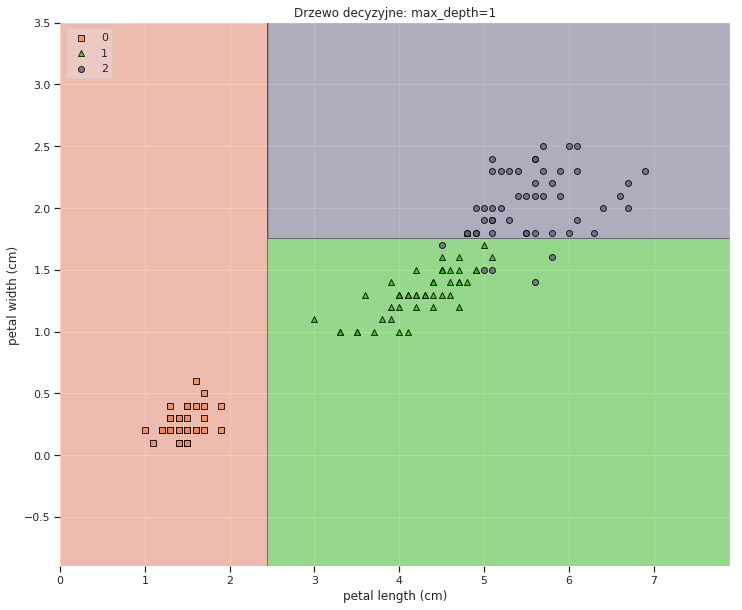

In [9]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')

In [10]:
print('Dokładność modelu: ' + str(round(tree_clf.score(X, y), 4) * 100) + '%')

Dokładność modelu: 96.0%


### Utworzenie grafu drzewa

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

### Przekonwertowanie pliku .dot na plik .png

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_1.png

<img src='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/iris_tree_2.png' width=350>

### Wskaźnik Giniego
Miara zanieczyszczenia
- węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$

$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

#### korzeń (root)

In [13]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

#### wezęł lewy, poziom 1

In [14]:
1 - (50 / 50)**2 - (0 / 50)**2 - (0 / 50)**2

0.0

#### węzeł prawy, poziom 1

In [15]:
1 - (0 / 100)**2 - (50 / 100)**2 - (50 / 100)**2

0.5

#### węzeł lewy, poziom 2

In [16]:
1 - (0 / 54)**2 - (49 / 54)**2 - (5 / 54)**2

0.1680384087791495

#### węzeł prawy, poziom 2

In [17]:
1 - (0 / 46)**2 - (1 / 46)**2 - (45 / 46)**2

0.04253308128544431